In [2]:
from qiskit import QuantumCircuit, transpile
# from qiskit.providers.aer import QasmSimulator
# from qiskit.providers.basicaer import QasmSimulatorPy
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeManila, FakeToronto, FakeJakartaV2, FakeProvider
from qiskit.circuit import Parameter
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.synthesis import QDrift, LieTrotter, SuzukiTrotter

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn.preprocessing as skp
from scipy.signal import savgol_filter
import os
import sys
from datetime import date
import pathlib
import inspect
import time
import glob
import pickle as pkl
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('..')) # qrc_surrogate
sys.path.append(module_path)
fig_path = f'{module_path}/figs'


from src.feedforward import QExtremeLearningMachine, CPolynomialFeedforward
from src.rewinding import QRewindingRC, QRewindingStatevectorRC,  QRewindingRC_Neat
from src.data import DataSource

from iqm.qiskit_iqm import IQMFakeAdonis
from iqm.qiskit_iqm import IQMProvider,transpile_to_IQM

server_url = "https://cocos.resonance.meetiqm.com/garnet"  # For example https://cocos.resonance.meetiqm.com/garnet
api_token = "w8yFvWKCBEj26UGLs6H/OpoPgJtyzhT05Qj89TTyWXsGa9IttUZ494AAS29Z0Cju"

SHOTS = 8000

backend = IQMProvider(server_url, token=api_token).get_backend()

import pickle as pkl

In [3]:
with open('Simulated_Results.pickle', 'rb') as handle:
    SimDict=pkl.load(handle)

In [4]:
with open('Real_Results.pickle', 'rb') as handle:
    RealDict=pkl.load(handle)

In [5]:
SimDict

{'train_w_R': 0.1557188338039383,
 'val_w_R': 0.250979456677648,
 'train_o_R': 0.1835132568544082,
 'val_o_R': 0.258545923978605}

In [6]:
RealDict

{'train_w_R': 0.15933542172033538, 'val_w_R': 0.3099608155561443}

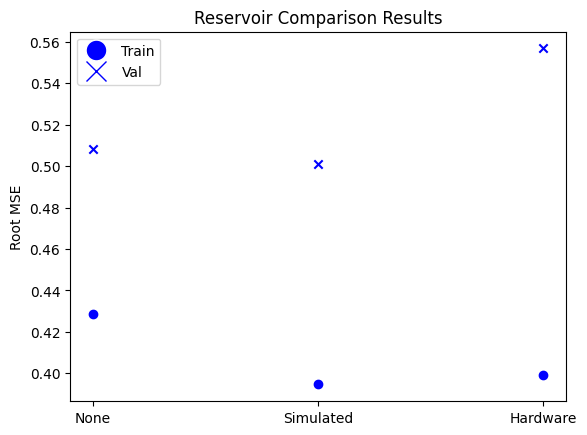

In [16]:
plt.scatter([1,2,3],np.sqrt(np.array([SimDict['train_o_R'],SimDict['train_w_R'],RealDict['train_w_R'],])),marker='o',color='b')
plt.scatter([1,2,3],np.sqrt(np.array([SimDict['val_o_R'],SimDict['val_w_R'],RealDict['val_w_R'],])),marker='x',color='b')
plt.title('Reservoir Comparison Results')
plt.ylabel('Root MSE')
plt.xticks([1,2,3],['None','Simulated','Hardware'])
plt.legend(handles= [Line2D([0], [0], marker='o', color='w', label='Train',
                          markerfacecolor='b', markersize=15),
                    Line2D([0], [0], marker='x', color='b', label='Val',linestyle='None',
                          markerfacecolor='b', markersize=15)

                          
                          
                          
                          ])

In [46]:
with open('Simulated_Results_0.pickle', 'rb') as handle:
    SimDict_0=pkl.load(handle)
with open('Real_Results_0.pickle', 'rb') as handle:
    RealDict_0=pkl.load(handle)

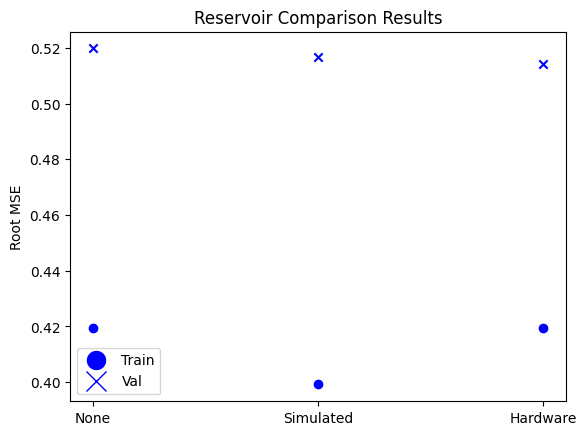

In [47]:
plt.scatter([1,2,3],np.sqrt(np.array([SimDict_0['train_o_R'],SimDict_0['train_w_R'],RealDict_0['train_w_R'],])),marker='o',color='b')
plt.scatter([1,2,3],np.sqrt(np.array([SimDict_0['val_o_R'],SimDict_0['val_w_R'],RealDict_0['val_w_R'],])),marker='x',color='b')
plt.title('Reservoir Comparison Results')
plt.ylabel('Root MSE')
plt.xticks([1,2,3],['None','Simulated','Hardware'])
plt.legend(handles= [Line2D([0], [0], marker='o', color='w', label='Train',
                          markerfacecolor='b', markersize=15),
                    Line2D([0], [0], marker='x', color='b', label='Val',linestyle='None',
                          markerfacecolor='b', markersize=15)

                          
                          
                          
                          ])

In [48]:
np.pi/(4) + (np.pi**2)/(2**(4))

1.4022484384655332

In [49]:
np.pi/(2**3) + (np.pi**2)/(2**(6))

0.5469116504657454